In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pmdarima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error
import akshare as ak
security ="000001"
begin_date ='20131231'
end_date = '20231231'

df = ak.index_zh_a_hist(symbol =security,period='daily',start_date=begin_date,end_date= end_date)


In [2]:
train_len = int(df.shape[0] * 0.9)
train_data, test_data = df[:train_len], df[train_len:]

y_train = train_data['收盘'].values
y_test = test_data['收盘'].values


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22826.277, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22894.372, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22887.092, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22885.874, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22892.584, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22884.020, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22883.051, Time=0.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22808.334, Time=2.83 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22879.234, Time=1.20 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=22809.480, Time=2.92 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22829.593, Time=4.85 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=22868.148, Time=0.90 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=22810.973, Time=4.07 sec
 ARIMA(3,1,2)(0,0,0)[0]  

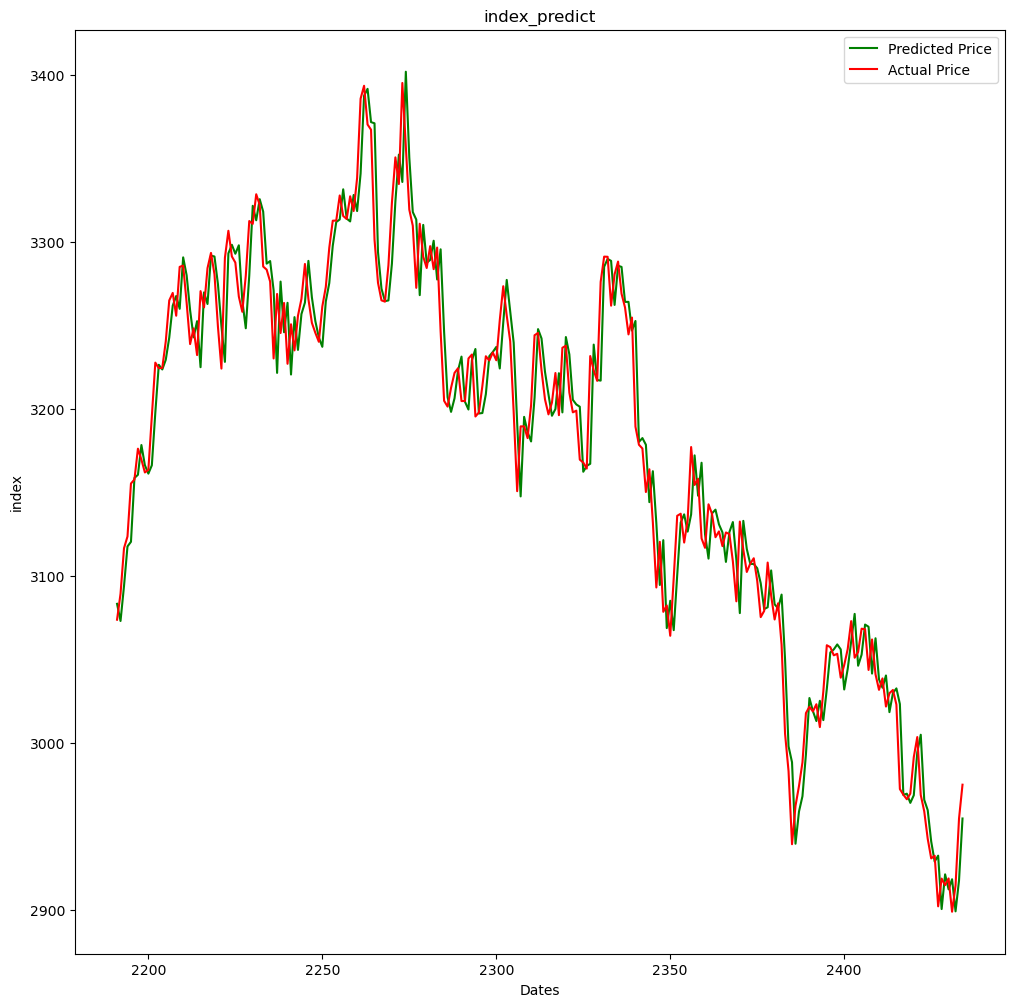

In [4]:
model = auto_arima(y_train, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,max_order=None, trace=True)

#一次训练
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

#更新多次
for new_ob in y_test:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)
    
    #使用少量MLE步骤更新现有模型
    model.update(new_ob)

plt.figure(figsize=(12,12))

#结果

plt.plot(test_data.index, forecasts, color='green',label='Predicted Price')
plt.plot(test_data.index, y_test, color='red', label='Actual Price')

plt.title('index_predict')
plt.xlabel('Dates')

plt.ylabel('index')
plt.legend()
plt.show()